<a href="https://colab.research.google.com/github/Megha0222/sum/blob/main/week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [254]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import metrics

In [255]:
df=pd.read_csv("/content/erpfcst_1993-2015.wk2.csv")

In [256]:
df.head()
a=range(1,333)
b=range(1,773)

In [257]:
df.drop(['date'],axis=1)

,observed,forecast
0,1.6121,0.231986
1,0.3287,0.146507
2,0.0845,0.532116
3,0.0000,0.271035
4,0.0000,0.420541
...,...,...
1099,0.0000,0.869074
1100,0.0000,2.019781
1101,0.0000,0.003295
1102,0.0000,0.038315


In [258]:
X=np.asanyarray(df[['observed']]).astype('int')
y=np.asanyarray(df['forecast']).astype('int')
print(X.shape)
print(y.shape)

(1104, 1)
(1104,)


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [260]:
len(X_train)


772

LINEAR REGRESSION

In [261]:
#LINEAR REGRESSION
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [262]:
LR.score(X, y)   #COEFFICIENT
LR.coef_

array([0.32785032])

In [263]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [264]:
LR_predict = LR.predict(X_test) #Predictions on Testing data
print(LR_predict)

[ 0.57522275  0.57522275  0.57522275  0.57522275  0.57522275  2.21447433
  0.57522275  0.57522275  0.57522275  0.90307306  0.57522275  0.57522275
  0.57522275  0.57522275  0.57522275  0.57522275  0.57522275  3.85372592
  0.90307306  0.57522275  0.90307306  0.57522275  2.87017497  1.88662402
  0.90307306  2.21447433  0.57522275  0.57522275  0.57522275  0.57522275
  0.57522275  6.47652846  0.57522275  2.21447433  0.57522275  0.57522275
  2.21447433  0.57522275  0.90307306  0.57522275  0.57522275  0.57522275
  0.57522275  0.57522275  0.57522275 10.08288195  0.57522275  0.57522275
  1.5587737   0.57522275  0.57522275  0.57522275  0.57522275  0.57522275
  0.57522275  3.5258756   7.46007941  0.57522275  0.57522275  2.87017497
  0.57522275  0.57522275  0.57522275  0.57522275  0.57522275  3.5258756
  0.57522275  4.18157624  0.57522275  0.57522275  0.90307306  0.57522275
  0.57522275  0.57522275  0.57522275  0.57522275  4.18157624  0.57522275
  0.57522275  0.57522275  0.57522275  0.57522275  0.

In [265]:
# np.savetxt('/content/sample_data.csv',X_test ,delimiter=',')

In [266]:
# model accuracy (ncmrwf forecast vs Bias Corrected (LM) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.4700474876160632
MSE: 7.939830047803217
RMSE: 2.81777040367082

-------Train Data--------
MAE: 1.2544554690237455
MSE: 4.7138009491180055
RMSE: 2.1711289572749948

-----Training Accuracy-------
23.400000000000002
-----Testing Accuracy--------
13.0


In [267]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.6716867469879517
MSE: 16.71385542168675
RMSE: 4.088258238135985
-------observation vs model forecast --------
MAE: 1.3421658136435528
MSE: 7.874011929283708
RMSE: 2.806066985886778


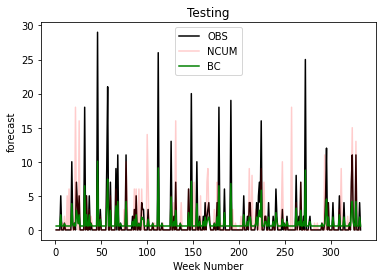

In [268]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('LM.png')


plt.show()

Text(0.5, 1.0, 'Testing')

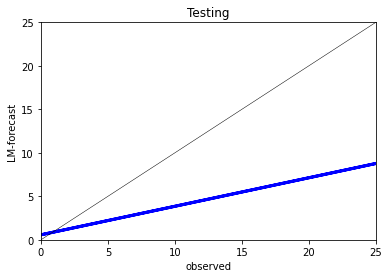

In [269]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('LM-forecast')
plt.title('Testing')


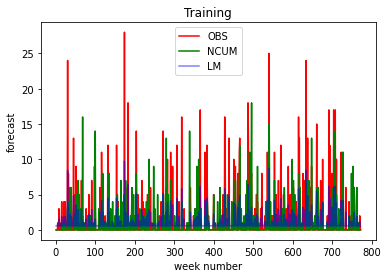

In [232]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Training')

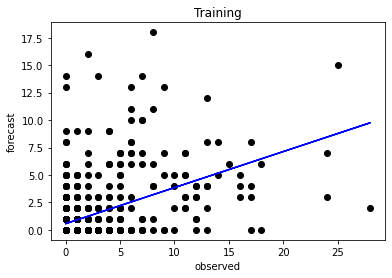

In [233]:

#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Testing')

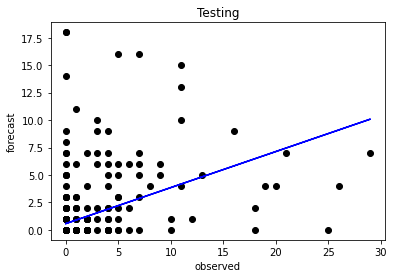

In [234]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

SUPPORT VECTOR MACHINE CODE


In [235]:
#SUPPORT VECTOR CLASSIFIER
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [236]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [237]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.6716867469879517
MSE: 16.71385542168675
RMSE: 4.088258238135985
-------observation vs model forecast --------
MAE: 1.5150602409638554
MSE: 16.69578313253012
RMSE: 4.086047372771163


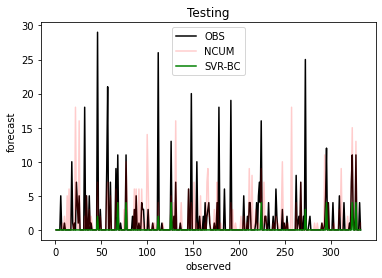

In [238]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "SVR-BC")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('SVR.png')

plt.show()

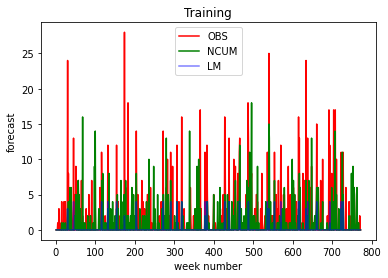

In [239]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Testing')

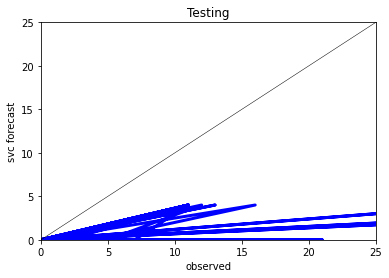

In [241]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('svc forecast')
plt.title('Testing')

Text(0.5, 1.0, 'Training')

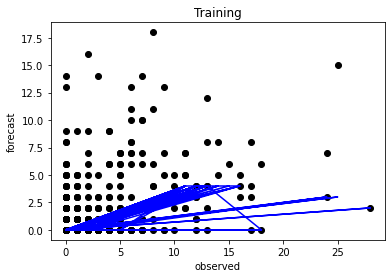

In [242]:
#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')



Text(0.5, 1.0, 'Testing')

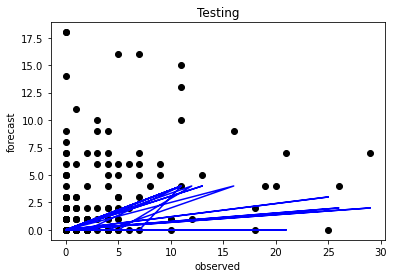

In [243]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

RANDOM FOREST CLASSIFIER

In [244]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [245]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [246]:
random_forest_model_predict = random_forest_model.predict(X_test) #Predictions on Testing data
print(random_forest_model_predict)

[0.39896155 0.39896155 0.39896155 0.39896155 0.39896155 2.95174008
 0.39896155 0.39896155 0.39896155 1.02867036 0.39896155 0.39896155
 0.39896155 0.39896155 0.39896155 0.39896155 0.39896155 3.44735526
 1.02867036 0.39896155 1.02867036 0.39896155 4.46546824 2.72185877
 1.02867036 2.95174008 0.39896155 0.39896155 0.39896155 0.39896155
 0.39896155 4.89631288 0.39896155 2.95174008 0.39896155 0.39896155
 2.95174008 0.39896155 1.02867036 0.39896155 0.39896155 0.39896155
 0.39896155 0.39896155 0.39896155 5.22671259 0.39896155 0.39896155
 1.75135565 0.39896155 0.39896155 0.39896155 0.39896155 0.39896155
 0.39896155 4.96708153 4.93971512 0.39896155 0.39896155 4.46546824
 0.39896155 0.39896155 0.39896155 0.39896155 0.39896155 4.96708153
 0.39896155 3.81557481 0.39896155 0.39896155 1.02867036 0.39896155
 0.39896155 0.39896155 0.39896155 0.39896155 3.81557481 0.39896155
 0.39896155 0.39896155 0.39896155 0.39896155 0.39896155 1.69262022
 0.39896155 1.75135565 0.39896155 2.95174008 0.39896155 0.3989

In [247]:
# model accuracy (ncmrwf forecast vs Bias Corrected (RF) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.349863728347987
MSE: 7.430806410972953
RMSE: 2.725950551820952

-------Train Data--------
MAE: 1.1637506686906465
MSE: 4.265308929585839
RMSE: 2.065262436008034

-----Training Accuracy-------
23.400000000000002
-----Testing Accuracy--------
13.0


In [248]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))

-------observation vs ncmrwf forecast--------
MAE: 1.6716867469879517
MSE: 16.71385542168675
RMSE: 4.088258238135985
-------observation vs model forecast --------
MAE: 1.1461947017353438
MSE: 9.58721899459126
RMSE: 3.0963234641411836


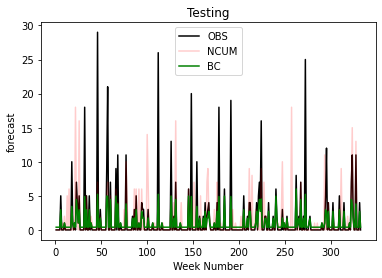

In [249]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('RF.png')
plt.show()

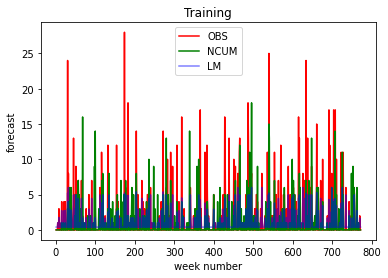

In [250]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()

Text(0.5, 1.0, 'Testing')

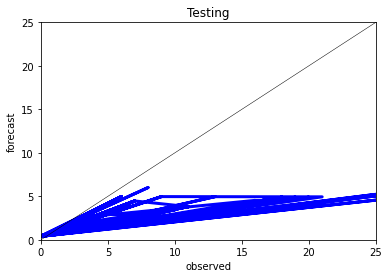

In [251]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')


Text(0.5, 1.0, 'Training')

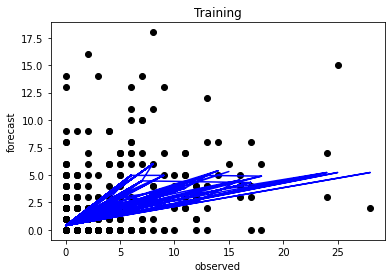

In [252]:
#plot outputs of training data

plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Training')

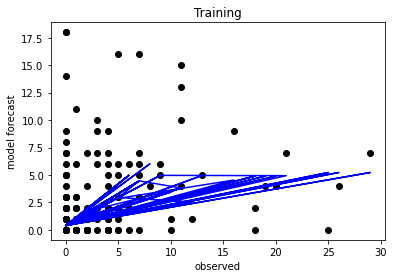

In [253]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Training')